<a href="https://colab.research.google.com/github/ym001/distancia/blob/master/notebook/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install distancia==0.0.30

from distancia import Euclidean, Manhattan

print(Euclidean().calculate([2,3], [3,4]))
print(Manhattan().calculate([2,3], [3,4]))


1.4142135623730951
2


In [5]:
from distancia import ShortestPath

# Define a graph using a dictionary
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Initialize the ShortestPath class with the graph
shortest_path_calculator = ShortestPath()

# Compute the shortest path distance between nodes 'A' and 'D'
distance = shortest_path_calculator.calculate(graph,'A', 'D')
print(f"The shortest path distance between A and D is: {distance}")

The shortest path distance between A and D is: 4


In [2]:
from distancia import GraphEditDistance

graph1 = {
    'A': {'B', 'C'},
    'B': {'A', 'C'},
    'C': {'A', 'B'}
}

graph2 = {
    'A': {'B'},
    'B': {'A', 'D'},
    'C': {'D'},
    'D': {'B', 'C'}
}

ged_calculator = GraphEditDistance()
distance = ged_calculator.calculate(graph1, graph2)
print(f"The Graph Edit Distance between the two graphs is: {distance}")


The Graph Edit Distance between the two graphs is: 5


In [8]:
from distancia import SpectralDistance
import networkx as nx

def create_sample_graphs():
    # Create a path graph
    P10 = nx.path_graph(10)

    # Create a cycle graph
    C10 = nx.cycle_graph(10)

    # Create a complete graph
    K10 = nx.complete_graph(10)

    # Create two random graphs
    G1 = nx.gnm_random_graph(10, 20)
    G2 = nx.gnm_random_graph(10, 20)

    return P10, C10, K10, G1, G2

def compare_graphs(graphs, names):
    # Initialize SpectralDistance object
    sd = SpectralDistance(k=5, normalized=True)

    print("Spectral distances between graphs:")
    for i, (G1, name1) in enumerate(zip(graphs, names)):
        for j, (G2, name2) in enumerate(zip(graphs[i+1:], names[i+1:])):
            distance = sd.calculate(G1, G2)
            print(f"{name1} vs {name2}: {distance:.4f}")

def main():
    # Create sample graphs
    P10, C10, K10, G1, G2 = create_sample_graphs()
    graph_names = ["Path", "Cycle", "Complete", "Random1", "Random2"]

    # Compare the graphs
    compare_graphs([P10, C10, K10, G1, G2], graph_names)

if __name__ == "__main__":
    main()

Spectral distances between graphs:
Path vs Cycle: 1.0351
Path vs Complete: 1.0969
Path vs Random1: 0.6753
Path vs Random2: 0.6829
Cycle vs Complete: 1.9245
Cycle vs Random1: 1.4917
Cycle vs Random2: 1.5456
Complete vs Random1: 0.8237
Complete vs Random2: 0.7512
Random1 vs Random2: 0.1167


In [9]:
import networkx as nx

from distancia import WeisfeilerLehmanSimilarity

def create_sample_graphs():
    # Create a cycle graph
    C5 = nx.cycle_graph(5)

    # Create a path graph
    P5 = nx.path_graph(5)

    # Create a complete graph
    K5 = nx.complete_graph(5)

    # Create a star graph
    S5 = nx.star_graph(4)

    # Create two random graphs
    G1 = nx.gnm_random_graph(5, 7)
    G2 = nx.gnm_random_graph(5, 7)

    return C5, P5, K5, S5, G1, G2

def compare_graphs(graphs, names):
    # Initialize WeisfeilerLehmanSimilarity object
    wl = WeisfeilerLehmanSimilarity(num_iterations=3)

    print("Weisfeiler-Lehman similarities between graphs:")
    for i, (G1, name1) in enumerate(zip(graphs, names)):
        for j, (G2, name2) in enumerate(zip(graphs[i+1:], names[i+1:])):
            similarity = wl.calculate(G1, G2)
            print(f"{name1} vs {name2}: {similarity:.4f}")

        # Check for potential isomorphism with itself (should always be true)
        is_iso = wl.is_isomorphic(G1, G1)
        print(f"Is {name1} isomorphic to itself? {is_iso}")

    # Check for potential isomorphism between different graphs
    print("\nChecking for potential isomorphism:")
    for i, (G1, name1) in enumerate(zip(graphs, names)):
        for j, (G2, name2) in enumerate(zip(graphs[i+1:], names[i+1:])):
            is_iso = wl.is_isomorphic(G1, G2)
            print(f"Are {name1} and {name2} potentially isomorphic? {is_iso}")

def main():
    # Create sample graphs
    C5, P5, K5, S5, G1, G2 = create_sample_graphs()
    graph_names = ["Cycle", "Path", "Complete", "Star", "Random1", "Random2"]

    # Compare the graphs
    compare_graphs([C5, P5, K5, S5, G1, G2], graph_names)

if __name__ == "__main__":
    main()

Weisfeiler-Lehman similarities between graphs:
Cycle vs Path: 0.3849
Cycle vs Complete: 0.2500
Cycle vs Star: 0.2500
Cycle vs Random1: 0.3125
Cycle vs Random2: 0.2778
Is Cycle isomorphic to itself? True
Path vs Complete: 0.2500
Path vs Star: 0.3125
Path vs Random1: 0.3125
Path vs Random2: 0.2778
Is Path isomorphic to itself? True
Complete vs Star: 0.2778
Complete vs Random1: 0.2778
Complete vs Random2: 0.2500
Is Complete isomorphic to itself? True
Star vs Random1: 0.2778
Star vs Random2: 0.2500
Is Star isomorphic to itself? True
Random1 vs Random2: 0.3571
Is Random1 isomorphic to itself? True
Is Random2 isomorphic to itself? True

Checking for potential isomorphism:
Are Cycle and Path potentially isomorphic? False
Are Cycle and Complete potentially isomorphic? False
Are Cycle and Star potentially isomorphic? False
Are Cycle and Random1 potentially isomorphic? False
Are Cycle and Random2 potentially isomorphic? False
Are Path and Complete potentially isomorphic? False
Are Path and Star 

L1 distance between stationary distributions: 0.1300
L2 distance between stationary distributions: 0.0436
KL divergence between stationary distributions: 0.0095

Results for graph1:
Average walk length: 20.00
Node visit frequencies:
  Node 0: 0.1205
  Node 1: 0.1461
  Node 2: 0.1171
  Node 3: 0.1198
  Node 4: 0.0323
  Node 5: 0.0617
  Node 6: 0.0887
  Node 7: 0.0862
  Node 8: 0.0853
  Node 9: 0.1424

Results for graph2:
Average walk length: 20.00
Node visit frequencies:
  Node 0: 0.1075
  Node 1: 0.1285
  Node 2: 0.1283
  Node 3: 0.1321
  Node 4: 0.0309
  Node 5: 0.0777
  Node 6: 0.0781
  Node 7: 0.0787
  Node 8: 0.1080
  Node 9: 0.1300


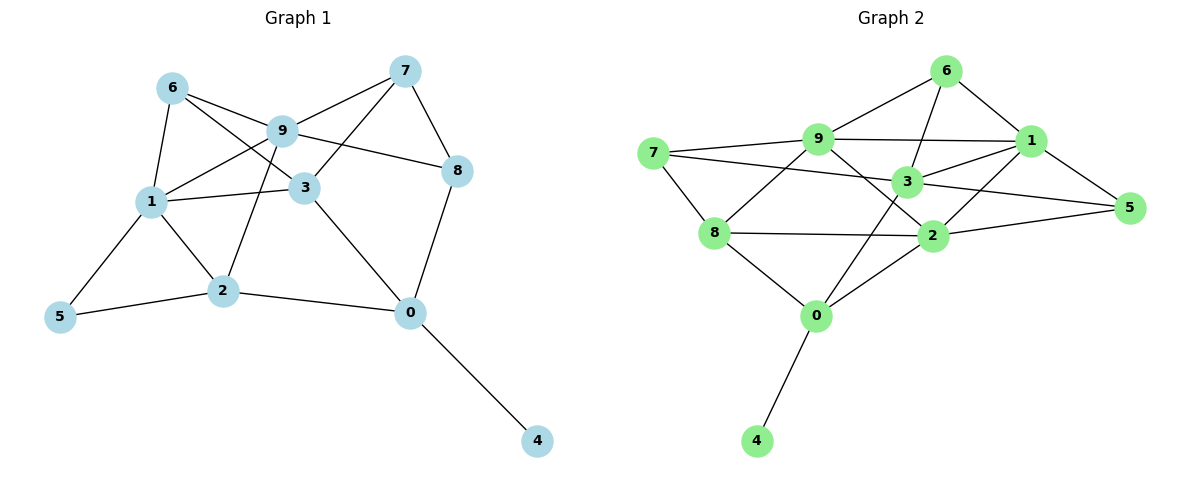

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from distancia import ComparingRandomWalkStationaryDistributions

# Create two similar but slightly different graphs
G1 = nx.erdos_renyi_graph(10, 0.3, seed=42)
G2 = nx.erdos_renyi_graph(10, 0.35, seed=42)

# Initialize the Distance object
distance = ComparingRandomWalkStationaryDistributions(G1, G2)

# Compare the stationary distributions
l1_distance = distance.compare_distributions(metric='l1')
l2_distance = distance.compare_distributions(metric='l2')
kl_distance = distance.compare_distributions(metric='kl')

print(f"L1 distance between stationary distributions: {l1_distance:.4f}")
print(f"L2 distance between stationary distributions: {l2_distance:.4f}")
print(f"KL divergence between stationary distributions: {kl_distance:.4f}")

# Compare random walks
walk_comparison = distance.compare_random_walks(num_walks=1000, walk_length=20)

# Print results
for graph_name, results in walk_comparison.items():
    print(f"\nResults for {graph_name}:")
    print(f"Average walk length: {results['avg_walk_length']:.2f}")
    print("Node visit frequencies:")
    for node, freq in results['node_visit_frequencies'].items():
        print(f"  Node {node}: {freq:.4f}")

# Visualize the graphs
plt.figure(figsize=(12, 5))

plt.subplot(121)
nx.draw(G1, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Graph 1")

plt.subplot(122)
nx.draw(G2, with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold')
plt.title("Graph 2")

plt.tight_layout()
plt.show()